In [53]:
%env CUDA_VISIBLE_DEVICES=-1

env: CUDA_VISIBLE_DEVICES=-1


In [54]:
import numpy as np
import seaborn as sns

In [55]:
from keras.models import Model, load_model

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["image.cmap"] = "Spectral"
import warnings as war
war.simplefilter("ignore")

In [57]:
from numpy import load
from tensorflow import device

def director(data, base):
    """Generate a pair of traning or testing data from directory"""
    with device('/cpu:0'):
        names = open(data+".lst")
        datas = load(data+".npy")

        while True:
            for i, spec in enumerate(names):
                dat = load(f"{base}/{spec.strip()}.npy")
                dat = dat.reshape((1,) + dat.shape + (1,))
                out = datas[i,:].reshape((1,) + (datas.shape[1],))
                yield dat, out

In [58]:
NAME = "linear"
DATA = "valid"

In [59]:
loss, acc, val_loss, val_acc = np.loadtxt(NAME+".out", unpack=True)

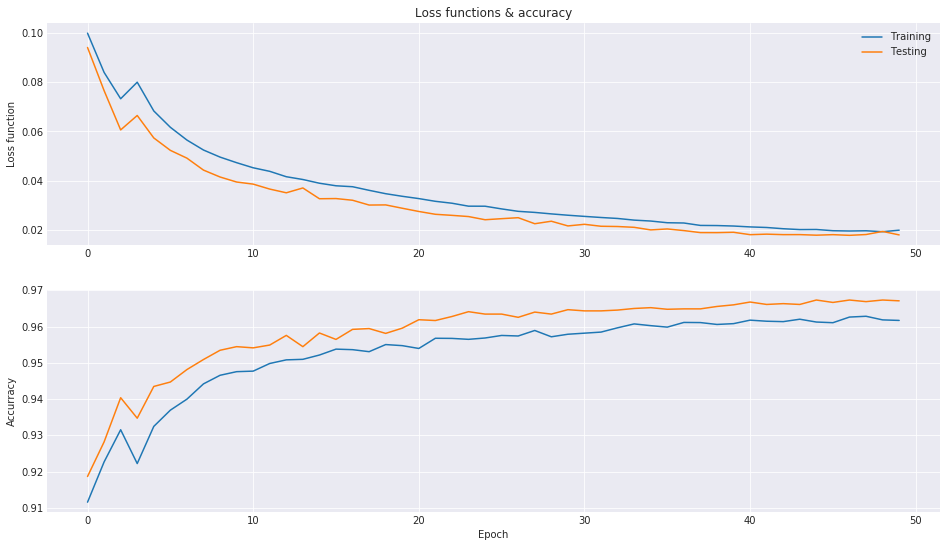

In [60]:
plt.subplot(2, 1, 1)
plt.title("Loss functions & accuracy")
plt.ylabel("Loss function")
plt.plot(loss, label="Training")
plt.plot(val_loss, label="Testing")
plt.legend(); plt.grid(True)

plt.subplot(2, 1, 2)
plt.xlabel("Epoch")
plt.ylabel("Accurracy")
plt.plot(acc, label="Training")
plt.plot(val_acc, label="Testing")
#plt.legend(); plt.grid(True)

In [61]:
MODEL = load_model(NAME+".hdf5")

In [62]:
for X, Y in director(DATA, "reshape"):
    if np.random.randint(101) == 8:
        break

In [63]:
#plt.figure(figsize=(16,16))
#plt.xticks([]); plt.yticks([])
#plt.imshow(X[0,:,:,0])
#plt.grid(False)

In [64]:
def feature(layer):
    mydel = Model(MODEL.input, MODEL.get_layer(layer).output)
    myfet = mydel.predict(X)
    _, _, _, x = myfet.shape
    y = x // 4
    plt.figure(figsize=(16,16/5*y))
    for i in range(y):
        for j in range(4):
            n = i*4+j
            plt.subplot(y, 4, 1+n)
            plt.xticks([]); plt.yticks([])
            plt.imshow(myfet[0,:,:,n])
            plt.grid(False)
            plt.colorbar()

In [65]:
#feature("Conv1")

In [66]:
#feature("Max2")

In [67]:
def filters(N):
    W = MODEL.get_weights()
    x, y, s, v = W[N].shape
    plt.figure(figsize=(16,16/s*v))
    for i in range(v):
        for j in range(s):
            n = i*s+j
            plt.subplot(v, s, 1+n)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(W[N][:,:,j,i],
                       interpolation="quadric")
    plt.grid(False)

In [68]:
W = MODEL.get_weights()
for i, w in enumerate(W):
    print(i, w.shape)

0 (32, 1, 8)
1 (8,)
2 (16, 8, 16)
3 (16,)
4 (8, 16, 32)
5 (32,)
6 (576, 512)
7 (512,)
8 (512, 128)
9 (128,)
10 (128, 32)
11 (32,)
12 (32, 3)
13 (3,)


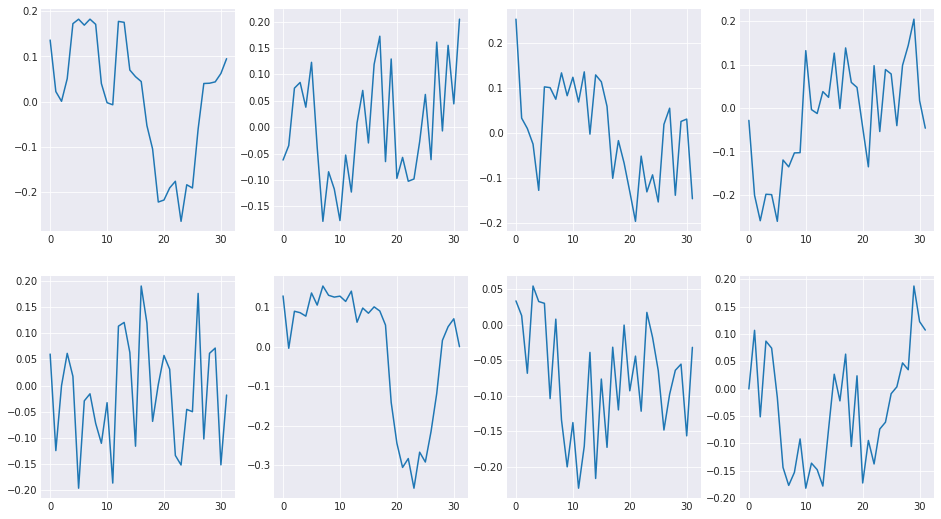

In [76]:
ww = W[0]
for i in range(8):
    plt.subplot(2,4,1+i)
    plt.plot(ww[:,0,i])

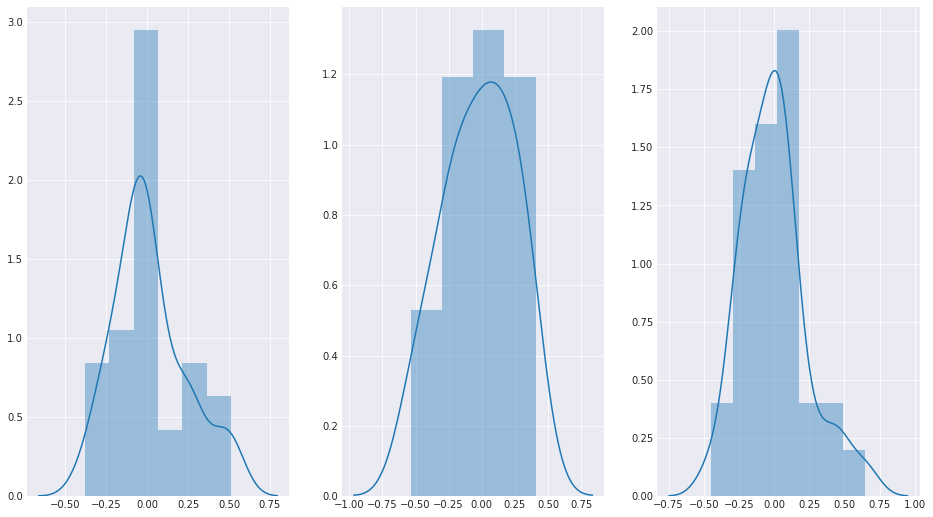

In [71]:
ww = W[12]
for i in range(3):
    plt.subplot(1, 3, 1+i)
    sns.distplot(ww[:,i])

In [72]:
#filters(4)

In [73]:
%%time
OUTPUT = np.load(DATA+".npy")
PREDIC = MODEL.predict_generator(director(DATA, "linear"), steps=len(OUTPUT))
ERRORF = np.sqrt(np.sum((PREDIC-OUTPUT)**2,axis=1))

CPU times: user 2min 17s, sys: 1min 32s, total: 3min 50s
Wall time: 2min 19s


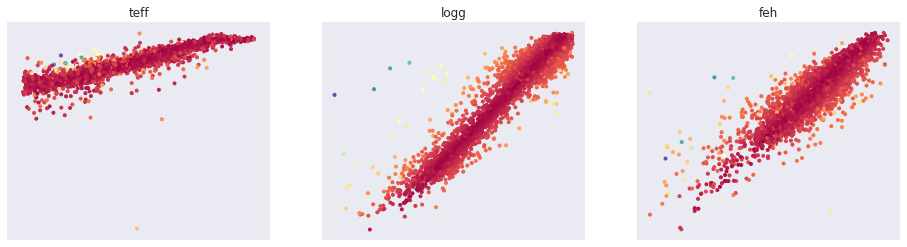

In [74]:
tip = ["teff", "logg", "feh"] #! tip @Lamost && key @Pollux
plt.figure(figsize=(16,4))
for i, name in enumerate(tip):
    plt.subplot(131+i)
    plt.title(name)
    plt.xticks([]); plt.yticks([])
    plt.scatter(OUTPUT[:,i], PREDIC[:,i], c=ERRORF, s=9)

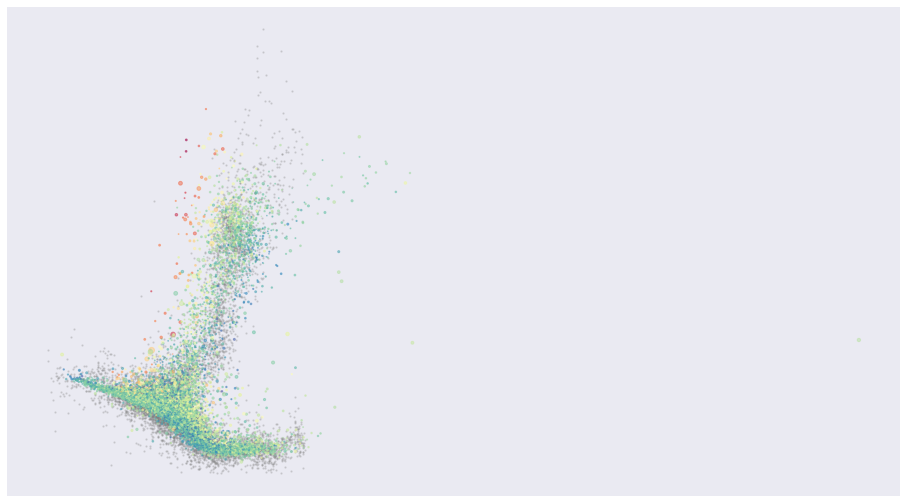

In [75]:
#plt.title("Colored uncertainty of functionality")
#plt.xlabel("Logaritmus of $T_\mathrm{eff}$")
#plt.ylabel("Logaritmus of $g$")
plt.scatter(OUTPUT[:,0], OUTPUT[:,1], c="gray", s=2, alpha=0.2)
plt.scatter(PREDIC[:,0], PREDIC[:,1], c=PREDIC[:,2], s=10*ERRORF, alpha=0.5)
plt.gca().invert_xaxis(); plt.gca().invert_yaxis();
plt.xticks([]); plt.yticks([]);
#plt.colorbar();